### 1. Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from geopy.geocoders import Nominatim

#import datetime 
import datetime

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
clients_data = pd.read_csv("data/clientDataClean.csv",index_col=0)

In [3]:
clients_data

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,drinks_alcohol,...,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n
0,Örjan,Douberday,wdouberday0@google.com.br,Male,mdouberday0,1961-01-17 00:12:00,Portuguese,Setúbal,False,False,...,arroz de pato,sopa de tomate,mindful,MBWay,familiar,seafood,13:00 - 14:00,19:00 - 20:00,13.0,False
1,Céline,Milmo,lmilmo1@naver.com,Male,lmilmo1,1986-01-02 00:11:00,Portuguese,Setúbal,True,False,...,cheesecake,bitoque,mindful,Cash,after work,portuguese,13:00 - 14:00,21:00 - 22:00,15.0,False
2,Bérénice,McCaughey,jmccaughey2@blogs.com,Male,kmccaughey2,1991-01-10 00:05:00,Portuguese,Porto,True,True,...,pasta,arroz de pato,foodie,Credit Card,after work,mediterranean,12 :00 - 13:00,18 :00 - 19:00,13.0,False
3,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,1974-01-21 00:10:00,Portuguese,Coimbra,False,True,...,filetes de pescada,ceviche,foodie,MBWay,after work,portuguese,13:00 - 14:00,20:00 - 21:00,26.0,False
4,Yáo,O'Sheilds,aosheilds4@pbs.org,Female,hosheilds4,1969-01-05 00:01:00,Portuguese,Leiria,False,True,...,tacos,salada de frutas,social,MBWay,homemade,meat cuisine,13:00 - 14:00,19:00 - 20:00,20.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Vérane,Rayner,mraynerro@icio.us,Male,braynerro,1977-01-06 00:04:00,Portuguese,Castelo Branco,False,False,...,bacalhau a gomes de sa,pasta,social,MBWay,homemade,mediterranean,14:00 - 15:00,19:00 - 20:00,20.0,False
997,Jú,Boyd,rboydrp@github.com,Male,sboydrp,1970-01-16 00:09:00,Portuguese,Faro,True,False,...,pimentos,croissant,comfort,Credit Card,traditional,mediterranean,12 :00 - 13:00,19:00 - 20:00,13.0,False
998,Françoise,Laudham,blaudhamrq@squarespace.com,Female,hlaudhamrq,1962-01-18 00:03:00,Portuguese,Porto,False,True,...,bacalhau à zé do pipo,filetes de pescada,comfort,MBWay,view,international,13:00 - 14:00,19:00 - 20:00,26.0,False
999,Andréa,Sinyard,csinyardrr@disqus.com,Male,fsinyardrr,1986-01-09 00:01:00,Portuguese,Lisbon,True,True,...,bacalhau a bras,lasanha,foodie,Cash,fine dining,pizzeria,12 :00 - 13:00,19:00 - 20:00,13.0,False


In [4]:
clients_data.drop(['first_name','last_name','username', 'email', 'favourite_food', 'dislike_food', 'personality'], axis=1, inplace=True)

In [5]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                1001 non-null   object 
 1   date_of_birth         1001 non-null   object 
 2   nationality           1001 non-null   object 
 3   city                  1001 non-null   object 
 4   travel_car            1001 non-null   bool   
 5   drinks_alcohol        1001 non-null   bool   
 6   dietary_restrictions  1001 non-null   object 
 7   allergies             1001 non-null   object 
 8   preferred_payment     1001 non-null   object 
 9   restaurant_style      1001 non-null   object 
 10  cuisine_type          892 non-null    object 
 11  lunch_hour            1001 non-null   object 
 12  dinner_hour           1001 non-null   object 
 13  normal_price_range    1001 non-null   float64
 14  smoker_n              1001 non-null   bool   
dtypes: bool(3), float64(1), ob

In [6]:
clients_data.isna().sum()

gender                    0
date_of_birth             0
nationality               0
city                      0
travel_car                0
drinks_alcohol            0
dietary_restrictions      0
allergies                 0
preferred_payment         0
restaurant_style          0
cuisine_type            109
lunch_hour                0
dinner_hour               0
normal_price_range        0
smoker_n                  0
dtype: int64

### 2. Pre-processing

In [7]:
#normal price as integer
clients_data['normal_price_range'] = clients_data['normal_price_range'].astype(int)

In [8]:
# Define the number of bins you want (e.g., 3 bins)
# num_bins = 3

# Create bins with equal quantiles
# clients_data['normal_price_range'] = pd.qcut(clients_data['normal_price_range'], q=num_bins, labels=False)

# Add 1 to the labels to start from 1 instead of 0
# clients_data['normal_price_range'] = clients_data['normal_price_range'] + 1

In [9]:
# Replace 'brazillian' with 'brazilian' in the 'nationality' column
clients_data['nationality'] = clients_data['nationality'].replace('Brazillian', 'Brazilian')

In [10]:
#alterar input nossas observações
clients_data.drop(1000, inplace=True)



#Calculating Age
current_date = datetime.date.today()

clients_data['date_of_birth'] = pd.to_datetime(clients_data['date_of_birth'], format='%Y-%m-%d %H:%M:%S')
clients_data['date_of_birth'] = clients_data['date_of_birth'].dt.date

clients_data['age'] = ((current_date - clients_data['date_of_birth'])/ pd.Timedelta(days=365)).astype(int)
clients_data.drop(['date_of_birth'], axis=1, inplace=True)

In [11]:
clients_data['lunch_hour'] = clients_data['lunch_hour'].str.extract(r'(\d{2})').astype(int)
clients_data['dinner_hour'] = clients_data['dinner_hour'].str.extract(r'(\d{2})').astype(int)

In [12]:
# Transform 'smoker_n' into binary
clients_data['smoker_n'] = clients_data['smoker_n'].astype(int)

In [13]:
# Transform 'travel_car' into binary
clients_data['travel_car'] = clients_data['travel_car'].astype(int)

In [14]:
# Transform 'drinks_alcohol' into binary
clients_data['drinks_alcohol'] = clients_data['drinks_alcohol'].astype(int)

In [15]:
def has_allergies(allergies):
    if allergies == "none":
        return 0
    else:
        return 1#Transform 'allergies' to binary (0 - No allergies, 1 - Has allergies)
clients_data['allergies'] = clients_data['allergies'].apply(has_allergies)

In [16]:
# Function to get the latitude and longitude of a city
def geocode_city(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None


In [17]:
# Initialize the geolocator
geolocator = Nominatim(user_agent="city_locator")

#Apply function geocode_city
clients_data['city_latitude'], clients_data['city_longitude'] = zip(*clients_data['city'].apply(geocode_city))

#Drop feature 'city'
clients_data.drop(['city'], axis=1, inplace=True)

In [18]:
cuisine_types_to_remove = ['greek', 'chinese', 'fusion', 'african', 'meat', 'vegetarian', 'grilled','meat cuisine']
clients_data = clients_data[~clients_data['cuisine_type'].isin(cuisine_types_to_remove)]

In [19]:
restaurant_style_to_remove = ['nightlife', 'breakfast', 'romantic', 'organic', 'friendly', 'ceremony', 'oceanfront','wine bar','business']
clients_data = clients_data[~clients_data['restaurant_style'].isin(restaurant_style_to_remove)]

In [20]:
condition= clients_data['nationality'].isin(['Italian', 'Spanish', 'Ukrainian', 'Mozambican', 'Cape Verdean', 'Angolan', 'French', 'German'])
clients_data.drop(clients_data[condition].index, inplace = True)

In [21]:
#Transform 'American Express', 'Maestro Card', 'Mastercard','Visa' and 'Visa Electron' to Credit Carr
clients_data['preferred_payment'].replace(['American Express','Mastercard', 'Maestro Card', 'Visa', 'Visa Electron'],'Credit Card', inplace = True)


In [22]:
#Drop 'Apple Pay' and 'Paypal'
condition = clients_data['preferred_payment'].isin(['Apple Pay','Paypal'])
clients_data.drop(clients_data[condition].index, inplace = True)

### 2. Visulization

Text(0, 0.5, 'normal_price_range')

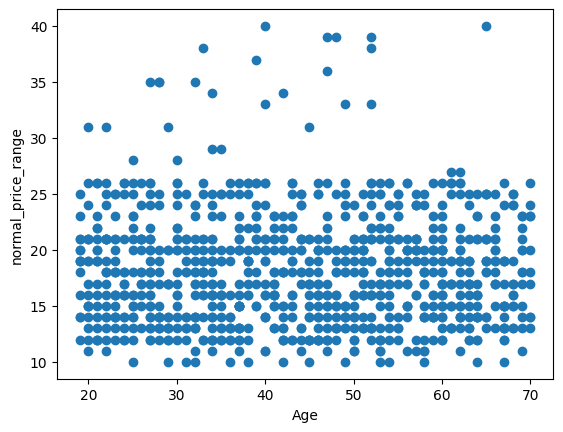

In [23]:
plt.scatter(clients_data.age, clients_data.normal_price_range)
plt.xlabel('Age')
plt.ylabel('normal_price_range')

### Get dummies

In [24]:
#Encoding gender
clients_data = pd.get_dummies(clients_data, columns=['gender'], prefix='gender')
clients_data.drop('gender_Female', axis=1, inplace=True)

# Transform boolean outputs into binary
clients_data['gender_Male'] = clients_data['gender_Male'].astype(int)
clients_data['gender_Other'] = clients_data['gender_Other'].astype(int)

In [25]:
#Encoding dietary_restrictions
clients_data = pd.get_dummies(clients_data, columns=['dietary_restrictions'])
clients_data.drop('dietary_restrictions_none', axis=1, inplace=True)

# Transform boolean outputs into binary
clients_data['dietary_restrictions_vegan'] = clients_data['dietary_restrictions_vegan'].astype(int)
clients_data['dietary_restrictions_vegetarian'] = clients_data['dietary_restrictions_vegetarian'].astype(int)

In [26]:
#Encoding gender preferred_payment
clients_data = pd.get_dummies(clients_data, columns=['preferred_payment'])
clients_data.drop('preferred_payment_Cash', axis=1, inplace=True)

# Transform boolean outputs into binary
clients_data['preferred_payment_Credit Card'] = clients_data['preferred_payment_Credit Card'].astype(int)
clients_data['preferred_payment_MBWay'] = clients_data['preferred_payment_MBWay'].astype(int)

### 3. Feature Selection

In [27]:
clients_data.columns

Index(['nationality', 'travel_car', 'drinks_alcohol', 'allergies',
       'restaurant_style', 'cuisine_type', 'lunch_hour', 'dinner_hour',
       'normal_price_range', 'smoker_n', 'age', 'city_latitude',
       'city_longitude', 'gender_Male', 'gender_Other',
       'dietary_restrictions_vegan', 'dietary_restrictions_vegetarian',
       'preferred_payment_Credit Card', 'preferred_payment_MBWay'],
      dtype='object')

In [28]:
clients_data.head()

,nationality,travel_car,drinks_alcohol,allergies,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n,age,city_latitude,city_longitude,gender_Male,gender_Other,dietary_restrictions_vegan,dietary_restrictions_vegetarian,preferred_payment_Credit Card,preferred_payment_MBWay
0,Portuguese,0,0,0,familiar,seafood,13,19,13,0,62,38.524178,-8.893234,1,0,0,0,0,1
1,Portuguese,1,0,0,after work,portuguese,13,21,15,0,37,38.524178,-8.893234,1,0,0,0,0,0
2,Portuguese,1,1,0,after work,mediterranean,12,18,13,0,32,41.149451,-8.610788,1,0,0,0,1,0
3,Portuguese,0,1,0,after work,portuguese,13,20,26,0,49,40.211193,-8.429463,1,0,0,0,0,1
6,Portuguese,0,0,0,after work,portuguese,11,20,25,0,23,38.015448,-7.865037,0,0,0,0,1,0


### 6.Label encoding

In [29]:
label_encoder1 = LabelEncoder()

clients_data['restaurant_style'] = label_encoder1.fit_transform(clients_data['restaurant_style'])


In [30]:
label_encoder2 = LabelEncoder()
# Apply label encoding to X_train
clients_data['cuisine_type'] = label_encoder2.fit_transform(clients_data['cuisine_type'])


In [31]:
label_encoder3 = LabelEncoder()
# Apply label encoding to X_train
clients_data['nationality'] = label_encoder3.fit_transform(clients_data['nationality'])


### 7. 

In [32]:
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

In [33]:
numeric_features = ['nationality', 'travel_car', 'drinks_alcohol', 'allergies',
       'restaurant_style', 'cuisine_type', 'lunch_hour', 'dinner_hour',
       'normal_price_range', 'smoker_n', 'age', 'city_latitude',
       'city_longitude', 'gender_Male', 'gender_Other',
       'dietary_restrictions_vegan', 'dietary_restrictions_vegetarian',
       'preferred_payment_Credit Card', 'preferred_payment_MBWay']

In [34]:
#Using StandardScalerto scale the data
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(clients_data[numeric_features])

# Transform the data to its standardized form
clients_data_scaled = scaler.transform(clients_data[numeric_features])

# Transform in dataframe
clients_data_scaled = pd.DataFrame(clients_data_scaled, columns=numeric_features)

In [35]:
clients_data_scaled.drop(['nationality','restaurant_style','cuisine_type'],axis=1,inplace=True)

In [36]:
# Initialize a list to store inertia scores
inertia_scores = []

# Iterate over different numbers of clusters
for n_clusters in range(1,30):
    # Create a K-means object with the desired number of clusters and random state
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(clients_data_scaled)
    
    # Compute the inertia score
    inertia_scores.append(kmeans.inertia_)

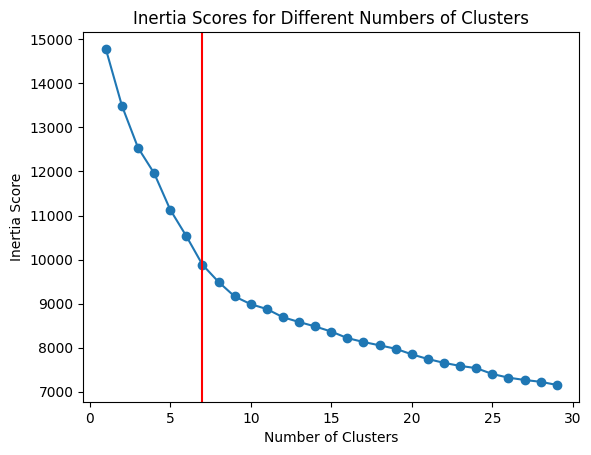

In [37]:
# Plot the inertia scores
plt.plot(range(1,30), inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Scores for Different Numbers of Clusters')
plt.axvline(x=7, color='red', linestyle='-')
plt.show()

In [38]:
#K-means for 7 clusters
kmeans = KMeans(n_clusters=7, random_state=0).fit(clients_data_scaled)
clients_data['cluster_kmeans'] = kmeans.predict(clients_data_scaled)

In [39]:
clients_data.groupby(['cluster_kmeans']).mean()

,nationality,travel_car,drinks_alcohol,allergies,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n,age,city_latitude,city_longitude,gender_Male,gender_Other,dietary_restrictions_vegan,dietary_restrictions_vegetarian,preferred_payment_Credit Card,preferred_payment_MBWay
cluster_kmeans,,,,,,,,,,,,,,,,,,,
0,4.689655,0.465517,0.431034,0.068966,3.189655,9.224138,12.568966,19.568966,17.413793,0.120690,43.896552,39.937262,-0.100446,0.465517,0.0,0.120690,0.206897,0.465517,0.327586
1,4.632653,0.489796,0.547619,0.000000,3.207483,8.595238,12.571429,19.554422,18.132653,0.000000,44.918367,39.857442,-8.157653,0.527211,0.0,0.000000,0.302721,0.000000,0.540816
2,4.408696,0.469565,0.469565,0.000000,3.191304,8.808696,12.608696,19.495652,17.347826,1.000000,44.643478,39.745926,-8.259691,0.573913,0.0,0.000000,0.278261,0.469565,0.269565
3,4.592885,0.513834,0.569170,0.000000,3.284585,8.731225,12.545455,19.478261,18.292490,0.000000,43.996047,39.966862,-8.326549,0.462451,0.0,0.000000,0.280632,1.000000,0.000000
4,4.593023,0.558140,0.627907,1.000000,2.651163,8.872093,12.569767,19.465116,18.127907,0.197674,42.918605,39.806894,-8.188096,0.511628,0.0,0.127907,0.197674,0.511628,0.290698
5,4.528090,0.471910,0.584270,0.000000,3.123596,9.078652,12.539326,19.595506,19.910112,0.157303,46.842697,39.951544,-8.155319,0.539326,0.0,1.000000,0.000000,0.573034,0.280899
6,4.448276,0.482759,0.482759,0.137931,3.103448,8.758621,12.620690,19.379310,19.379310,0.137931,26.965517,39.738429,-7.472231,0.000000,1.0,0.137931,0.275862,0.448276,0.413793


In [40]:
clients_data.mean()

nationality                         4.577922
travel_car                          0.496753
drinks_alcohol                      0.545455
allergies                           0.101732
restaurant_style                    3.162338
cuisine_type                        8.775974
lunch_hour                         12.567100
dinner_hour                        19.517316
normal_price_range                 18.243506
smoker_n                            0.169913
age                                44.003247
city_latitude                      39.879157
city_longitude                     -7.691939
gender_Male                         0.494589
gender_Other                        0.031385
dietary_restrictions_vegan          0.120130
dietary_restrictions_vegetarian     0.247835
preferred_payment_Credit Card       0.478355
preferred_payment_MBWay             0.293290
cluster_kmeans                      2.430736
dtype: float64